In [18]:
import git
import shutil
import os

# Function to clone a GitHub repository
def clone_repo(repo_url, clone_dir):
    try:
        # Clone the repo into the specified directory
        git.Repo.clone_from(repo_url, clone_dir)
        print(f"Repository cloned successfully into {clone_dir}")
    except Exception as e:
        print(f"Error cloning repository: {e}")

# Function to move the DATASET_NEW folder to a local directory
def move_dataset(repo_dir, dataset_folder_name, destination_path):
    dataset_src = os.path.join(repo_dir, dataset_folder_name)

    # Check if DATASET_NEW exists
    if os.path.exists(dataset_src):
        try:
            shutil.move(dataset_src, destination_path)
            print(f"Folder '{dataset_folder_name}' moved to {destination_path}")
        except Exception as e:
            print(f"Error moving folder: {e}")
    else:
        print(f"'{dataset_folder_name}' does not exist in the cloned repository.")

# Main execution
if __name__ == "__main__":
    # Repository URL and local clone path
    repo_url = "https://github.com/NatanshK/IGEM-IITR-Drylab.git"
    clone_dir = r"C:\Users\prish\OneDrive\Desktop\dataset"  # Local path where the repo will be cloned
    dataset_folder_name = "DATASET_NEW"
    
    # Path where you want to move the DATASET_NEW folder locally
    destination_path = r"C:\Users\prish\OneDrive\Desktop"

    # Step 1: Check if clone_dir already exists
    if os.path.exists(clone_dir):
        print(f"The directory {clone_dir} already exists. Please remove or rename it, or choose another location.")
    else:
        # Step 2: Clone the repository
        clone_repo(repo_url, clone_dir)

        # Step 3: Move the DATASET_NEW folder to the destination
        move_dataset(clone_dir, dataset_folder_name, destination_path)

        # Step 4: Check if the folder contains HEALTHY and REDDOT
        dataset_new_path = os.path.join(destination_path, dataset_folder_name)
        if os.path.exists(dataset_new_path):
            healthy_path = os.path.join(dataset_new_path, 'HEALTHY')
            reddot_path = os.path.join(dataset_new_path, 'REDDOT')
            if os.path.exists(healthy_path) and os.path.exists(reddot_path):
                print("HEALTHY and REDDOT subfolders are present.")
            else:
                print("Subfolders HEALTHY and/or REDDOT are missing.")
        else:
            print(f"Folder '{dataset_folder_name}' was not found at the destination.")


Repository cloned successfully into C:\Users\prish\OneDrive\Desktop\dataset
Folder 'DATASET_NEW' moved to C:\Users\prish\OneDrive\Desktop
HEALTHY and REDDOT subfolders are present.


In [22]:
import os

# Define the parent directory where DATASET_NEW should be
parent_directory = r"C:\Users\prish\OneDrive\Desktop"

# List all files and folders in the parent directory
try:
    items = os.listdir(parent_directory)
    print("Items in parent directory:", items)
except FileNotFoundError:
    print("Parent directory not found.")

# Define the full path to DATASET_NEW
dataset_new_path = os.path.join(parent_directory, "DATASET_NEW")

# Check if the DATASET_NEW folder exists
if os.path.exists(dataset_new_path):
    print(f"'DATASET_NEW' found at: {dataset_new_path}")
    
    # Define paths to HEALTHY and REDDOT directories
    healthy_path = os.path.join(dataset_new_path, 'HEALTHY')
    reddot_path = os.path.join(dataset_new_path, 'REDDOT')
    
    # Check if HEALTHY and REDDOT folders exist
    print("Healthy Path:", healthy_path)
    print("Reddot Path:", reddot_path)
    print("Does Healthy Path exist?", os.path.exists(healthy_path))
    print("Does Reddot Path exist?", os.path.exists(reddot_path))
else:
    print("'DATASET_NEW' folder not found in the specified parent directory.")


Items in parent directory: ['test', 'REDDOT', 'HEALTHY', 'DATASET_NEW', 'train']
'DATASET_NEW' found at: C:\Users\prish\OneDrive\Desktop/DATASET_NEW
Healthy Path: C:\Users\prish\OneDrive\Desktop/DATASET_NEW/HEALTHY
Reddot Path: C:\Users\prish\OneDrive\Desktop/DATASET_NEW/REDDOT
Does Healthy Path exist? True
Does Reddot Path exist? True


In [25]:
import os

# Define the paths to the HEALTHY and REDDOT directories
healthy_path = r"C:\Users\prish\OneDrive\Desktop/DATASET_NEW/HEALTHY"
reddot_path = r"C:\Users\prish\OneDrive\Desktop/DATASET_NEW/REDDOT"

# Function to list files in a directory
def list_files(directory):
    try:
        files = os.listdir(directory)
        return files
    except FileNotFoundError:
        return None

# Check the files in the HEALTHY folder
healthy_files = list_files(healthy_path)
if healthy_files is not None:
    print(f"Files in HEALTHY folder ({len(healthy_files)}):", healthy_files)
else:
    print("HEALTHY folder not found.")

# Check the files in the REDDOT folder
reddot_files = list_files(reddot_path)
if reddot_files is not None:
    print(f"Files in REDDOT folder ({len(reddot_files)}):", reddot_files)
else:
    print("REDDOT folder not found.")


Files in HEALTHY folder (4176): ['aug_healthy (334)_90.jpeg', 'aug_healthy (243)_270.jpeg', 'healthy (371)_90.jpeg', 'aug_healthy (208)_90.jpeg', 'healthy (200)_270.jpeg', 'healthy (39)_90.jpeg', 'aug_healthy (309)_270.jpeg', 'aug_healthy (287)_180.jpeg', 'aug_healthy (467)_180.jpeg', 'aug_healthy (207).jpeg', 'healthy (401)_90.jpeg', 'aug_healthy (99)_270.jpeg', 'aug_healthy (421)_180.jpeg', 'aug_healthy (163)_180.jpeg', 'aug_healthy (369)_90.jpeg', 'aug_healthy (460).jpeg', 'healthy (256)_90.jpeg', 'aug_healthy (108)_270.jpeg', 'aug_healthy (367)_180.jpeg', 'healthy (202)_270.jpeg', 'aug_healthy (16)_270.jpeg', 'healthy (149)_180.jpeg', 'aug_healthy (283)_90.jpeg', 'healthy (309)_270.jpeg', 'aug_healthy (350)_180.jpeg', 'healthy (130)_180.jpeg', 'aug_healthy (421).jpeg', 'aug_healthy (47)_270.jpeg', 'healthy (145)_180.jpeg', 'healthy (342)_90.jpeg', 'aug_healthy (184)_270.jpeg', 'aug_healthy (9).jpeg', 'aug_healthy (120).jpeg', 'aug_healthy (7)_180.jpeg', 'aug_healthy (285)_270.jpeg'

In [29]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the paths to the dataset
dataset_path = r"C:\Users\prish\OneDrive\Desktop/DATASET_NEW"

# Create an ImageDataGenerator for loading images
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of the data for validation
    preprocessing_function=preprocess_input
)

# Load images from the dataset directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

# Load the VGG16 model with pretrained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the VGG16 model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # For binary classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



Found 6650 images belonging to 2 classes.
Found 1662 images belonging to 2 classes.


In [31]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=6 # Adjust the number of epochs as needed
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Epoch 1/6
207/207 ━━━━━━━━━━━━━━━━━━━━ 1986s 10s/step - accuracy: 0.8615 - loss: 0.3102 - val_accuracy: 0.9534 - val_loss: 0.1264
Epoch 2/6
207/207 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9375 - loss: 0.1472 - val_accuracy: 0.9667 - val_loss: 0.1541
Epoch 3/6
207/207 ━━━━━━━━━━━━━━━━━━━━ 1968s 10s/step - accuracy: 0.9727 - loss: 0.0780 - val_accuracy: 0.9651 - val_loss: 0.1041
Epoch 4/6
207/207 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 1.0000 - loss: 0.0412 - val_accuracy: 0.9667 - val_loss: 0.0607
Epoch 5/6
207/207 ━━━━━━━━━━━━━━━━━━━━ 1987s 10s/step - accuracy: 0.9910 - loss: 0.0373 - val_accuracy: 0.9614 - val_loss: 0.0989
Epoch 6/6
207/207 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9688 - loss: 0.0789 - val_accuracy: 1.0000 - val_loss: 0.0391
52/52 ━━━━━━━━━━━━━━━━━━━━ 398s 8s/step - accuracy: 0.9706 - loss: 0.0832
Validation Accuracy: 96.93%


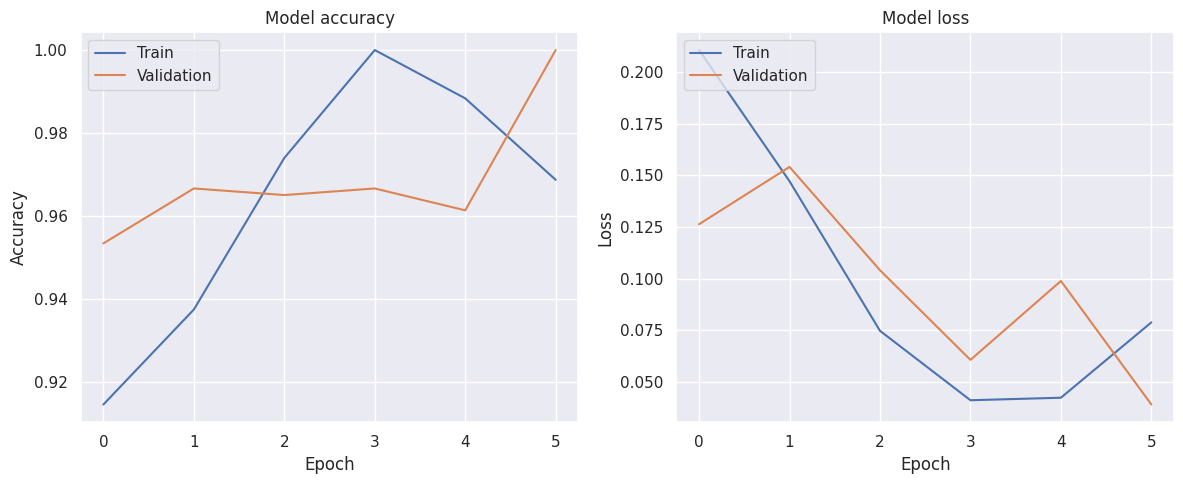

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
model.save('my_model.h5')
